In [1]:
## Timeseries Analysis in Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

lynx_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1-FzO-QtYX9saH2Xpb5Or3wtx0dY7jSkY", index_col=0, header=0, names=['year', 'trappings'])
nottem_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1-Crjfr2hipny9RN_4saB0zNj5ymOZw2m", index_col=0, header=0, names=['index', 'temp'])

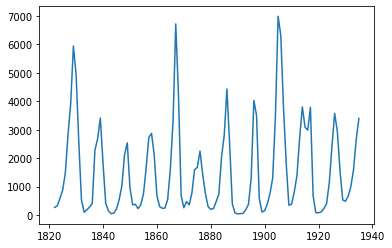

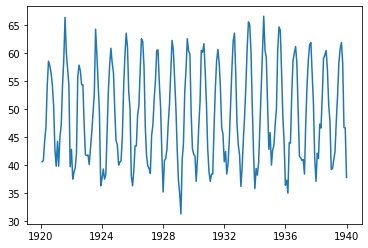

In [3]:
lynx_ts = pd.Series(lynx_df["trappings"].values, pd.date_range('31/12/1821', periods=len(lynx_df), freq='A-DEC'))
nottem_ts = pd.Series(nottem_df["temp"].values, pd.date_range('31/01/1920', periods=len(nottem_df), freq='M'))

plt.plot(lynx_ts)
plt.show()

plt.plot(nottem_ts)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
adfuller(lynx_ts, autolag='AIC')

(-2.996303675142558,
 0.03524103535901374,
 7,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 1635.975223662428)

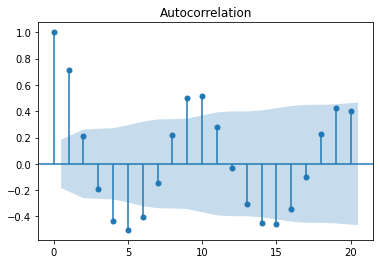

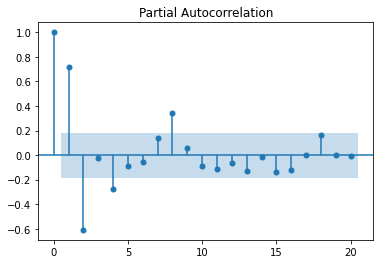

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(lynx_ts, lags=20);
plot_pacf(lynx_ts, lags=20);

In [6]:
import random

def gen_ts(start, coefs, count, error):
  assert(len(start) == len(coefs))
  assert(count > len(start))

  lst = start + [0] * (count - len(start))

  for i in range(len(start), count):
    lst[i] = random.uniform(-0.5, 0.5) * error
    for j in range (1, len(start)+1):
      lst[i] += coefs[j-1] * lst[i-j]

  return lst

1.3940180104247353e-19


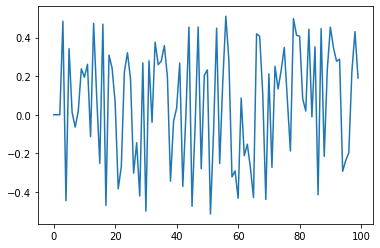

In [7]:
from statsmodels.tsa.stattools import adfuller

v = gen_ts([0] * 3, [0.0, 0, 0.1], 100, 1.0) # sum of coefficients < 1
plt.plot(v)
adf = adfuller(v, autolag='AIC')[1]
print(adf)

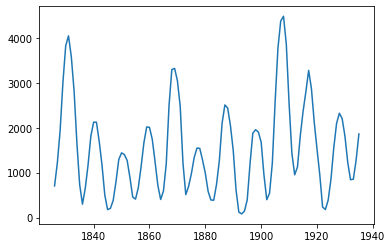

In [67]:
plt.plot(lynx_ts.rolling(5).mean())

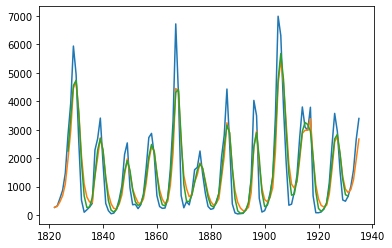

In [9]:
plt.plot(lynx_ts)
plt.plot(lynx_ts.ewm(alpha=0.5).mean())
plt.plot(lynx_ts.rolling(window=10, win_type="gaussian", center=True).mean(std=1))

[0.54235655]


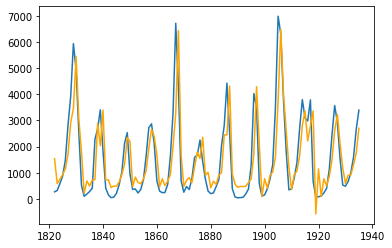

In [64]:
from statsmodels.tsa.arima.model import ARIMA

m = ARIMA(lynx_ts, order=([1], 0, 1))
results = m.fit()
plt.plot(lynx_ts)
plt.plot(results.fittedvalues, color="orange")
print(results.arparams)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -935.020
Date:                Sun, 21 Nov 2021   AIC                           1878.041
Time:                        15:13:04   BIC                           1888.985
Sample:                    12-31-1821   HQIC                          1882.483
                         - 12-31-1934                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1538.0176    258.564      5.948      0.000    1031.241    2044.794
ar.L1          1.1473      0.064     17.871      0.000       1.021       1.273
ar.L2         -0.5996      0.085     -7.079      0.000      -0.766      -0.434
sigma2      7.768e+05   8.08e+04      9.612      0.000    6.18e+05    9.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                47.33
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                             0.86
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

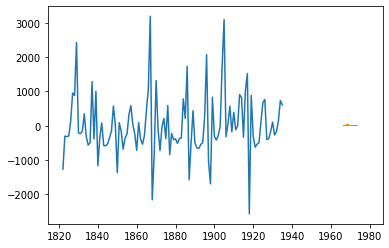

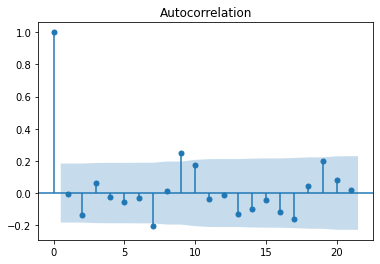

In [11]:
resid = lynx_ts - results.fittedvalues
plt.plot(resid)

import scipy.stats as stats
plt.hist(resid)
plot_acf(resid)
stats.shapiro(stats.zscore(resid))[1]

results.summary()

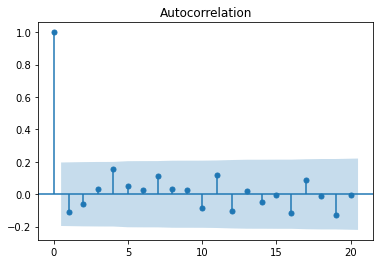

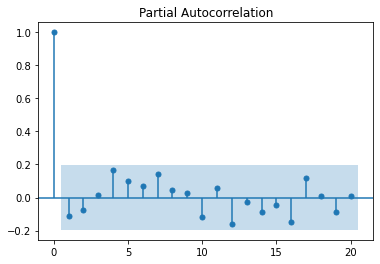

In [12]:
# plot various timeseries
white_noise = np.random.normal(0, 10, size=100)
plot_acf(white_noise)
plt.show()
plot_pacf(white_noise)
plt.show()

Expected value:  50.000000000000014


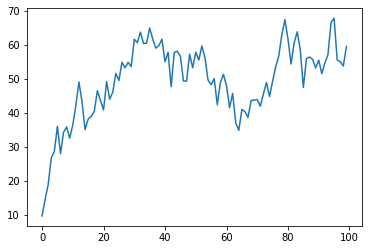

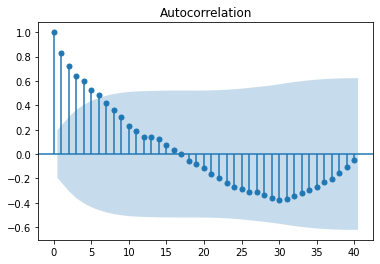

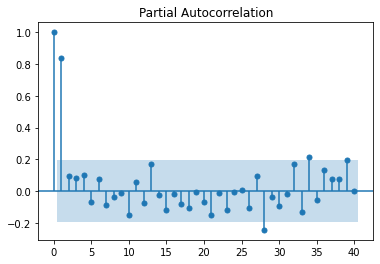

In [13]:
# ar(1) process
ts2 = [white_noise[0]]
phi_0 = 10
phi_1 = 0.8
k = 00.5 # 0 = perfectly noiseless, 1 = very noisy

# Expected value of the timeseries (perfect timeseries converges to this value)
miu = phi_0 / (1-phi_1)
print("Expected value: ", miu)

for i in range(1, 100):
    # note that without the error term this goes fast to the mean
    # AR(1)
    ts2.append(phi_0 + ts2[i-1] * phi_1 + k * white_noise[i])

ts2 = np.array(ts2)
plt.plot(ts2)

plot_acf(ts2, lags=40)
plt.show()
plot_pacf(ts2, lags=40)
plt.show()


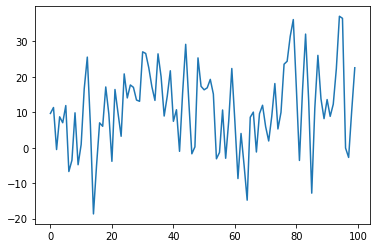

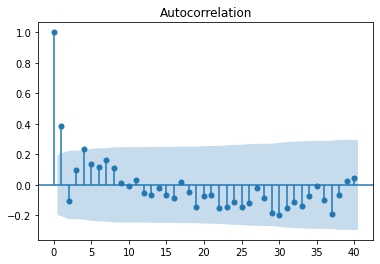

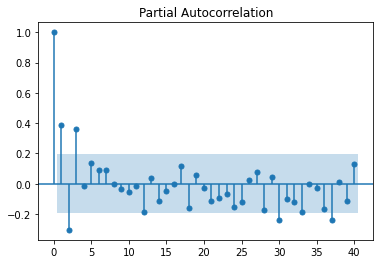

In [14]:
ts3 = [white_noise[0]]
mean = phi_0 = 10 # this is already the mean
phi_1 = 0.8
for i in range(1, 100):
    # MA(1)
    ts3.append(phi_0 + white_noise[i] + phi_1 * white_noise[i-1])

ts3 = np.array(ts3)
plt.plot(ts3)

plot_acf(ts3, lags=40)
plt.show()
plot_pacf(ts3, lags=40)
plt.show()

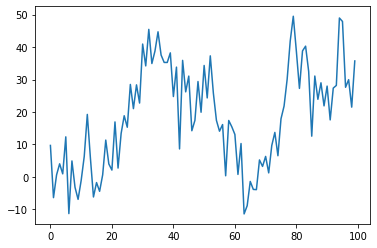

0.1807099668382452


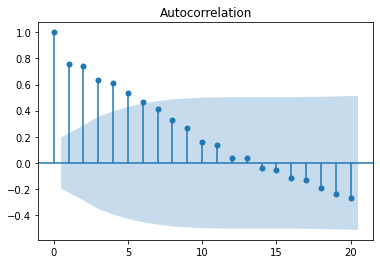

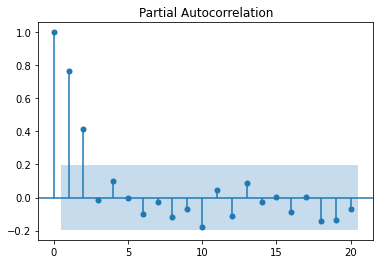

In [15]:
arma_series = [white_noise[0], white_noise[1]]
m = 5
phi_1 = 0.4
phi_2 = 0.3
theta_1 = 0.2
theta_2 = 0.2

# AR(2) I(0) MA(2)
for i in range(2, 100):
    arma_series.append( \
        m + \
        arma_series[i-1] * phi_1 + arma_series [i-2] * phi_2 + \
        white_noise[i] + theta_1 * white_noise[i-1] + theta_2 * white_noise [i-2])

plt.plot(arma_series)
plt.show()

adf = adfuller(arma_series, autolag='AIC')[1]
print(adf) # stationary

arma_series = np.array(arma_series)

# fit the model
plot_acf(arma_series)
plt.show()
plot_pacf(arma_series)
plt.show()

[0.76092039]


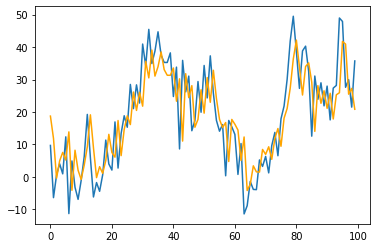

In [16]:
# sharp cutoff in PACF after lag 1 and slow decay in autocorrelation => try ARIMA(1, 0, 0)
from statsmodels.tsa.arima.model import ARIMA

m = ARIMA(arma_series, order=(1,0,0))
results = m.fit()
plt.plot(arma_series)
plt.plot(results.fittedvalues, color="orange")
print(results.arparams)

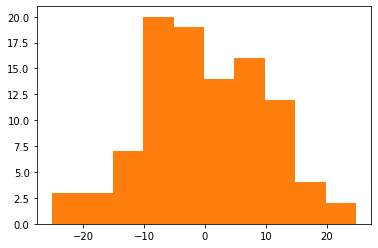

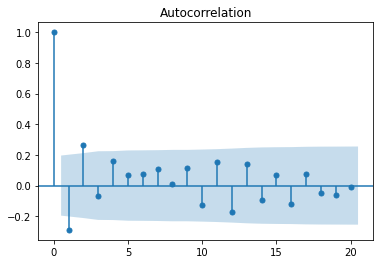

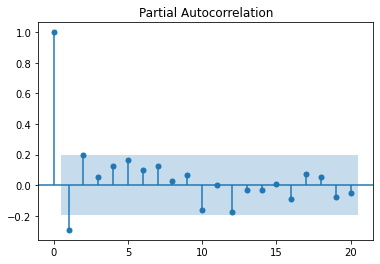

In [17]:
resid = arma_series - results.fittedvalues
plt.hist(resid)

import scipy.stats as stats
# visual inspection of the residuals
plt.hist(resid)
# Shapiro test for normality
stats.shapiro(stats.zscore(resid))[1]

# no autocorrelation
plot_acf(resid)
plt.show()
plot_pacf(resid)
plt.show()